In [1]:
from commons import *
from libruntimepredictionanalysis import *
from tqdm import tqdm_notebook as tqdm

# 1. Preliminaries: Pre-Processor Runtime Visualizations

In [212]:
df = pd.read_csv("data/runtimes_all_default_nooutliers.csv")
df = df[df["algorithm"].isin(['bf/cfssubseteval', 'gsw/cfssubseteval', 'correlationAS', 'GainRatioAS', 'InfoGainAS', 'PCAAS', 'ReliefFAS', 'SymmetricalUncertAS', 'OneRAS'])]

In [213]:
df

,openmlid,totalsize,fitsize,applicationsize,fitattributes,seed,algorithm,fittime,applicationtime
705413,41066,1567,10,1557,1,1,bf/cfssubseteval,0,0.0
705414,41066,1567,10,1557,2,1,bf/cfssubseteval,0,0.0
705415,41066,1567,10,1557,1,2,bf/cfssubseteval,0,0.0
705416,41066,1567,100,1467,1,1,bf/cfssubseteval,0,0.0
705417,41066,1567,10,1557,3,0,bf/cfssubseteval,0,0.0
...,...,...,...,...,...,...,...,...,...
983847,40971,1000,100,900,20,7,SymmetricalUncertAS,0,0.0
983848,40971,1000,100,900,10,8,SymmetricalUncertAS,0,0.0
983849,40971,1000,10,990,1033,9,SymmetricalUncertAS,0,0.0
983850,40971,1000,100,900,1033,8,SymmetricalUncertAS,0,0.0


In [214]:
algorithms = pd.unique(df["algorithm"])

In [47]:
df.query("applicationpoints > 1000000")

,openmlid,algo,datapoints,trainpoints,applicationpoints,attributes,seed,numinstances_before,numattributes_before,numlabels_before,...,accvarianceabs6_after,accvarianceabs7_after,accvarianceabs8_after,accvarianceabs9_after,accvarianceabs10_after,totalvariance_after,memory_peak,traintime,applicationtime,exception
666802,1216,bf/cfssubseteval,1496391,10,1496381,1,0,10.0,1.0,2.0,...,5.444444e-01,5.444444e-01,5.444444e-01,5.444444e-01,5.444444e-01,5.444444e-01,1.057555e+10,0.0,0.0,NaN
666803,1216,bf/cfssubseteval,1496391,10,1496381,1,1,10.0,1.0,2.0,...,3.555556e+00,3.555556e+00,3.555556e+00,3.555556e+00,3.555556e+00,3.555556e+00,1.071287e+10,0.0,0.0,NaN
666804,1216,bf/cfssubseteval,1496391,100,1496291,1,0,100.0,1.0,2.0,...,5.304040e-01,5.304040e-01,5.304040e-01,5.304040e-01,5.304040e-01,5.304040e-01,5.612124e+09,0.0,0.0,NaN
666805,1216,bf/cfssubseteval,1496391,10,1496381,2,0,10.0,2.0,2.0,...,1.163943e+12,1.163943e+12,1.163943e+12,1.163943e+12,1.163943e+12,1.163943e+12,4.326486e+09,1.0,0.0,NaN
666806,1216,bf/cfssubseteval,1496391,10,1496381,2,1,10.0,2.0,2.0,...,2.114210e+13,2.114210e+13,2.114210e+13,2.114210e+13,2.114210e+13,2.114210e+13,5.079539e+09,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736493,1569,SymmetricalUncertAS,1025000,20000,1005000,8,9,20000.0,8.0,8.0,...,4.581438e+01,4.705883e+01,4.829756e+01,4.829756e+01,4.829756e+01,4.829756e+01,8.230422e+09,0.0,0.0,NaN
736568,1569,SymmetricalUncertAS,1025000,20000,1005000,9,9,20000.0,9.0,8.0,...,5.870680e+01,5.995483e+01,6.119928e+01,6.243801e+01,6.243801e+01,6.243801e+01,8.499960e+09,0.0,0.0,NaN
736575,1569,SymmetricalUncertAS,1025000,20000,1005000,10,8,20000.0,10.0,8.0,...,7.133477e+01,7.258413e+01,7.383226e+01,7.507671e+01,7.631544e+01,7.631544e+01,1.246558e+10,1.0,0.0,NaN
736581,1569,SymmetricalUncertAS,1025000,10000,1015000,10,9,10000.0,10.0,8.0,...,7.158687e+01,7.284039e+01,7.408848e+01,7.533218e+01,7.657367e+01,7.657367e+01,1.588761e+09,0.0,0.0,NaN


In [13]:
def plotRuntimesOverNumbersOfInstances(cData, numPredictions, title):
    trainpoints = np.unique(cData["trainpoints"].values)
    trainpoints = trainpoints[trainpoints >= 10]
    q1aPointsY = []
    q3aPointsY = []
    q1bPointsY = []
    q3bPointsY = []
    medianPointsY = []
    q1aPointsZ = []
    q3aPointsZ = []
    q1bPointsZ = []
    q3bPointsZ = []
    medianPointsZ = []
    validTrainPoints = []
    #pointsY = []
    for tp in trainpoints:
        rData = cData.query("trainpoints == " + str(tp))
        y = numPredictions * rData["applicationtime"] / rData["applicationpoints"]
        y = y[~np.isnan(y)]
        z = rData["traintime"]
        #for i, v in enumerate(y):
        #    print(v)
        if len(y) > 4:
            validTrainPoints.append(tp)
            q1aPointsY.append(np.quantile(y, 0.1))
            q1bPointsY.append(np.quantile(y, 0.25))
            medianPointsY.append(np.median(y))
            q3aPointsY.append(np.quantile(y, 0.9))
            q3bPointsY.append(np.quantile(y, 0.75))
            
            q1aPointsZ.append(np.quantile(z, 0.1))
            q1bPointsZ.append(np.quantile(z, 0.25))
            medianPointsZ.append(np.median(z))
            q3aPointsZ.append(np.quantile(z, 0.9))
            q3bPointsZ.append(np.quantile(z, 0.75))
            #print(str(tp) + ": " + str(v))
        #meanPoints.append(np.mean(y))
        #pointsY.append(v)

    plt.figure()
    plt.title(title)# + " (train prediction RMSE quantile for 30s/1m/2m/5m/20m error: " + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 30), 2)) + "/" + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 60), 2)) + "/" + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 120), 2)) + "/" + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 300), 2)) + "/" + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 1200), 2)) + ")")
    #plt.boxplot(points, 0, '')
    if len(q1aPointsY) > 0:
        #plt.plot(validTainPoints, q1Points)
        plt.plot(validTrainPoints, medianPointsZ)
        plt.fill_between(validTrainPoints, q1aPointsZ, q3aPointsZ, color="blue",alpha=0.2)
        plt.fill_between(validTrainPoints, q1bPointsZ, q3bPointsZ, color="blue", alpha=0.2)
        plt.plot(validTrainPoints, medianPointsY)
        plt.fill_between(validTrainPoints, q1aPointsY, q3aPointsY, color="orange", alpha=0.2)
        plt.fill_between(validTrainPoints, q1bPointsY, q3bPointsY, color="orange", alpha=0.2)
        plt.axhline(10, color="red", linestyle="--", linewidth="1.2")
        plt.axhline(2, color="green", linestyle="--", linewidth="1")
        plt.axhline(300, color="green", linestyle=":", linewidth="1")
        plt.axhline(1200, color="orange", linestyle=":", linewidth="1")
        plt.axhline(3600, color="red", linestyle=":", linewidth="1")
        #plt.plot(validTainPoints, q3Points)
        #plt.xticks(trainpoints)
        #plt.scatter(trainpoints, meanPoints, color="green")
        #if len(points) > 0:
        plt.xlabel("Train Points")
        plt.ylabel("Runtime")
        plt.xscale("log")
        plt.xlim([16,100000])
        plt.ylim([0.1,10000])
        plt.yscale("log")
        legend=["Train Time", "Time for " + str(numPredictions) +" Predictions"]
        plt.legend(legend)
        
print(algorithms)
for i, a in enumerate(algorithms):
    plotRuntimesOverNumbersOfInstances(df.query("algorithm == '" + a + "'"), 10000, a)

        

['bf/cfssubseteval' 'gsw/cfssubseteval' 'correlationAS' 'GainRatioAS'
 'InfoGainAS' 'PCAAS' 'ReliefFAS' 'SymmetricalUncertAS' 'OneRAS']


KeyError: 'trainpoints'

# 2. Dispersion (Difficulty of the Learning Problem)

In [215]:
## FIRST STEP: Determining the dispersion (and "non-determinism") in the observed data
## Compute, for each classifier, the average variance in the execution times
import scipy
mstds = {}
stds = {}
for i, algo in enumerate(tqdm(algorithms)):
    cdf = df.query("algo == '" + algo + "'")
    combinations = cdf[["openmlid", "trainpoints", "attributes"]].drop_duplicates()
    observations = []
    for combo in combinations.values:
        runs = cdf.query("openmlid == '" + str(combo[0]) + "' and trainpoints == '" + str(combo[1]) + "' and attributes == " + str(combo[2]))[["traintime"]]
        var = np.std(runs.values)
        observations.append(var)
    mstds[algo] = scipy.stats.trim_mean(observations, 0.05)
    stds[algo] = np.std(cdf[["traintime"]].values)


UndefinedVariableError: name 'algo' is not defined

In [216]:
def plotDispersion(df, indexAttribute, batchAttributes, target,  ax=None):
    
    # First compute dispersions
    indexValues = pd.unique(df[indexAttribute])
    stds = []
    bstds = []
    for index in indexValues:
        group = df[df[indexAttribute] == index]
        stds.append(np.std(group[target]))
        subGroups = group.groupby(batchAttributes)
        subStds = []
        for j, subGroup in subGroups:
            subStds.append(np.std(subGroup[target]))
        bstds.append(np.mean(subStds))
    
    # now plot dispersions
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(7,6))
    ind = np.arange(len(stds))
    width=0.4
    ax.barh(ind, stds, width, label="Overall std")
    ax.barh(ind + width, bstds, width, color="red", label="Mean std within equivalence classes")
    ax.set_yticks(range(len(indexValues)))
    ax.set_yticklabels(indexValues, rotation=45)
    ax.set_xscale("log")
    ax.invert_yaxis()
    ax.axvline(1, color="blue", linestyle="--", linewidth="1")
    ax.axvline(10, color="green", linestyle="--", linewidth="1")
    ax.legend()
    return ax

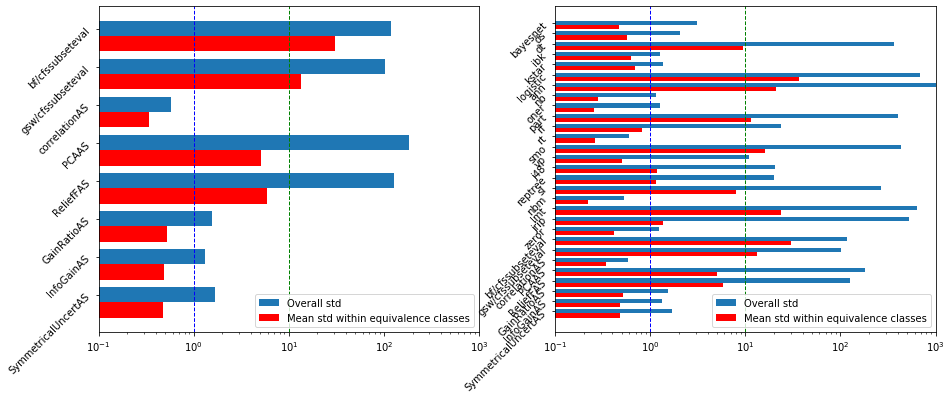

In [217]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plotDispersion(df, "algorithm", ["fitsize", "fitattributes"], "fittime", ax[0])
plotDispersion(gDF, "algorithm", ["fitsize", "fitattributes"], "fittime", ax[1])
for a in ax:
    a.set_xlim([0.1, 1000])
pass

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
735351        31       1000       10              990             28     1   
735519        31       1000       10              990             28     8   
821427      1486      34465       10            34455             28     2   
821496      1486      34465       10            34455             28     3   
821772      1486      34465       10            34455             28     7   
821910      1486      34465       10            34455             28     9   
841589      1037       4562       10             4552             28     5   
881115      4541     101766       10           101756             28     9   
976694      1114      50000       10            49990             28     3   

               algorithm  fittime  applicationtime  
735351  bf/cfssubseteval        0              0.0  
735519  bf/cfssubseteval        0              0.0  
821427  bf/cfssubseteval        0              0.0  
821496 

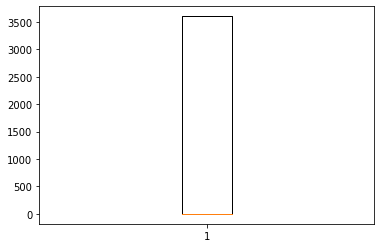

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
776518      4136        600      100              500           5000     0   
776537      4136        600      100              500           5000     1   
776555      4136        600      100              500           5000     2   
776570      4136        600      100              500           5000     3   
776584      4136        600      100              500           5000     4   
...          ...        ...      ...              ...            ...   ...   
991869      1166       1545      100             1445           5000     5   
991886      1166       1545      100             1445           5000     6   
991904      1166       1545      100             1445           5000     7   
991919      1166       1545      100             1445           5000     8   
991933      1166       1545      100             1445           5000     9   

               algorithm  fittime  applicationtime  
776518  bf

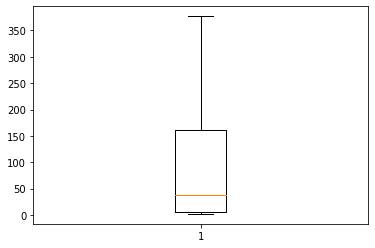

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
776532      4136        600      100              500           7500     0   
776545      4136        600      100              500           7500     1   
776561      4136        600      100              500           7500     2   
776579      4136        600      100              500           7500     3   
776592      4136        600      100              500           7500     4   
...          ...        ...      ...              ...            ...   ...   
991878      1166       1545      100             1445           7500     4   
991895      1166       1545      100             1445           7500     5   
991913      1166       1545      100             1445           7500     6   
991924      1166       1545      100             1445           7500     7   
991935      1166       1545      100             1445           7500     8   

               algorithm  fittime  applicationtime  
776532  bf

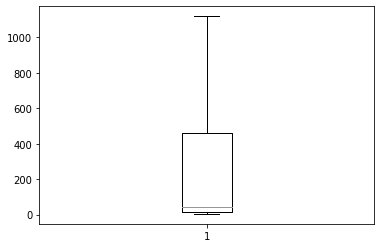

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
776546      4136        600      100              500          10000     0   
776562      4136        600      100              500          10000     1   
776577      4136        600      100              500          10000     2   
776588      4136        600      100              500          10000     3   
776600      4136        600      100              500          10000     4   
...          ...        ...      ...              ...            ...   ...   
991917      1166       1545      100             1445          10000     5   
991925      1166       1545      100             1445          10000     6   
991936      1166       1545      100             1445          10000     7   
991944      1166       1545      100             1445          10000     8   
991945      1166       1545      100             1445          10000     9   

               algorithm  fittime  applicationtime  
776546  bf

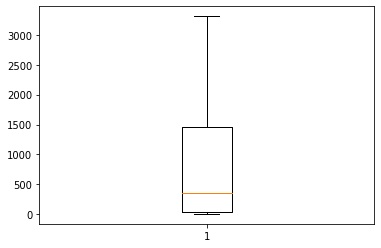

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
822000      1486      34465     1000            33465             82     4   
822185      1486      34465     1000            33465             82     7   
887497      4552       5665     1000             4665             82     5   
887574      4552       5665     1000             4665             82     7   

               algorithm  fittime  applicationtime  
822000  bf/cfssubseteval     3601              0.0  
822185  bf/cfssubseteval     3601              0.0  
887497  bf/cfssubseteval        0              0.0  
887574  bf/cfssubseteval        0              0.0  


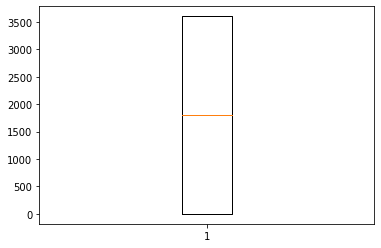

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
780577     41026       7000     1000             6000           5000     0   
780595     41026       7000     1000             6000           5000     1   
780665     41026       7000     1000             6000           5000     2   
780701     41026       7000     1000             6000           5000     3   
780733     41026       7000     1000             6000           5000     4   
...          ...        ...      ...              ...            ...   ...   
991889      1166       1545     1000              545           5000     5   
991912      1166       1545     1000              545           5000     6   
991930      1166       1545     1000              545           5000     7   
991931      1166       1545     1000              545           5000     8   
991941      1166       1545     1000              545           5000     9   

               algorithm  fittime  applicationtime  
780577  bf

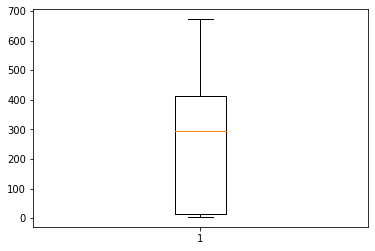

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
919367      1142       1545     1000              545           7500     0   
919418      1142       1545     1000              545           7500     2   
919439      1142       1545     1000              545           7500     3   
919457      1142       1545     1000              545           7500     4   
919472      1142       1545     1000              545           7500     5   
919484      1142       1545     1000              545           7500     6   
919492      1142       1545     1000              545           7500     7   
919498      1142       1545     1000              545           7500     8   
919500      1142       1545     1000              545           7500     9   
926728      1146       1545     1000              545           7500     0   
926749      1146       1545     1000              545           7500     1   
926778      1146       1545     1000              545           

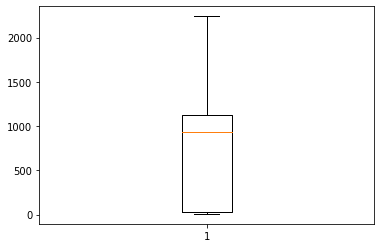

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
919401      1142       1545     1000              545          10000     1   
919440      1142       1545     1000              545          10000     2   
919458      1142       1545     1000              545          10000     3   
919473      1142       1545     1000              545          10000     4   
919485      1142       1545     1000              545          10000     5   
919493      1142       1545     1000              545          10000     6   
919499      1142       1545     1000              545          10000     7   
919502      1142       1545     1000              545          10000     8   
919503      1142       1545     1000              545          10000     9   
926753      1146       1545     1000              545          10000     0   
926779      1146       1545     1000              545          10000     1   
926802      1146       1545     1000              545          1

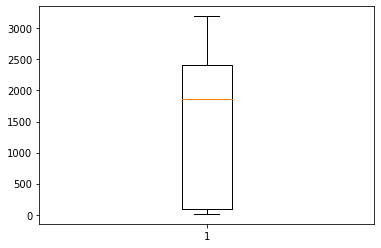

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
821799      1486      34465     2000            32465             54     2   
821887      1486      34465     2000            32465             54     3   
822217      1486      34465     2000            32465             54     9   
841612      1037       4562     2000             2562             54     1   

               algorithm  fittime  applicationtime  
821799  bf/cfssubseteval        0              0.0  
821887  bf/cfssubseteval     3601              0.0  
822217  bf/cfssubseteval     3601              0.0  
841612  bf/cfssubseteval        0              0.0  


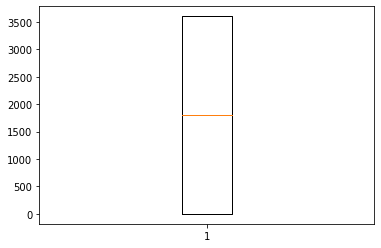

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
780618     41026       7000     5000             2000           2500     0   
780661     41026       7000     5000             2000           2500     1   
780696     41026       7000     5000             2000           2500     2   
780729     41026       7000     5000             2000           2500     3   
780758     41026       7000     5000             2000           2500     4   
780779     41026       7000     5000             2000           2500     5   
780796     41026       7000     5000             2000           2500     6   
780808     41026       7000     5000             2000           2500     7   
780812     41026       7000     5000             2000           2500     8   
780816     41026       7000     5000             2000           2500     9   
794525     40926      20000     5000            15000           2500     0   
794590     40926      20000     5000            15000           

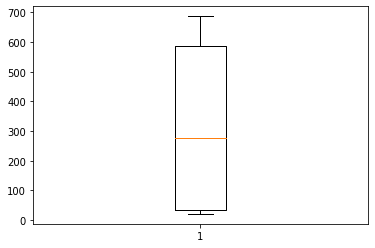

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
821964      1486      34465    20000            14465             56     1   
822161      1486      34465    20000            14465             56     4   
822293      1486      34465    20000            14465             56     7   
881263      4541     101766    20000            81766             56     5   

               algorithm  fittime  applicationtime  
821964  bf/cfssubseteval     3601              0.0  
822161  bf/cfssubseteval        0              0.0  
822293  bf/cfssubseteval     3601              0.0  
881263  bf/cfssubseteval        0              0.0  


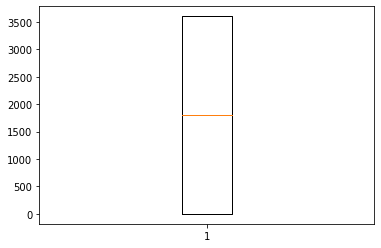

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
807180     40927      60000    50000            10000           1000     0   
807196     40927      60000    50000            10000           1000     1   
807232     40927      60000    50000            10000           1000     4   
807242     40927      60000    50000            10000           1000     5   
807246     40927      60000    50000            10000           1000     6   
895934       273     120919    50000            70919           1000     0   
895993       273     120919    50000            70919           1000     1   
896042       273     120919    50000            70919           1000     2   
896097       273     120919    50000            70919           1000     3   
896129       273     120919    50000            70919           1000     4   
896151       273     120919    50000            70919           1000     5   
896167       273     120919    50000            70919           

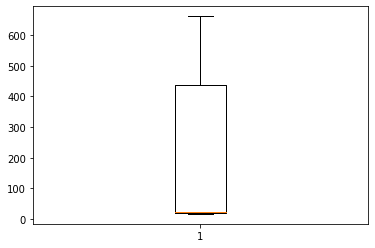

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
895457       273     120919   100000            20919            300     0   
895538       273     120919   100000            20919            300     1   
895631       273     120919   100000            20919            300     2   
895721       273     120919   100000            20919            300     3   
895803       273     120919   100000            20919            300     4   
895875       273     120919   100000            20919            300     5   
895944       273     120919   100000            20919            300     6   
895998       273     120919   100000            20919            300     7   
896058       273     120919   100000            20919            300     8   
896090       273     120919   100000            20919            300     9   
905273     41991     270912   100000           170912            300     1   
905340     41991     270912   100000           170912           

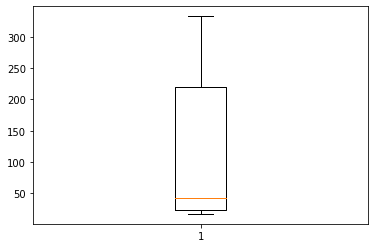

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
895546       273     120919   100000            20919            400     0   
895636       273     120919   100000            20919            400     1   
895722       273     120919   100000            20919            400     2   
895797       273     120919   100000            20919            400     3   
895868       273     120919   100000            20919            400     4   
895938       273     120919   100000            20919            400     5   
895997       273     120919   100000            20919            400     6   
896047       273     120919   100000            20919            400     7   
896095       273     120919   100000            20919            400     8   
896122       273     120919   100000            20919            400     9   
905267     41991     270912   100000           170912            400     0   
905330     41991     270912   100000           170912           

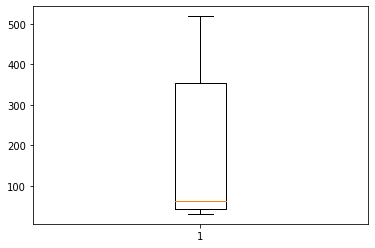

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
895662       273     120919   100000            20919            500     0   
895725       273     120919   100000            20919            500     1   
895807       273     120919   100000            20919            500     2   
895880       273     120919   100000            20919            500     3   
895948       273     120919   100000            20919            500     4   
896006       273     120919   100000            20919            500     5   
896045       273     120919   100000            20919            500     6   
896079       273     120919   100000            20919            500     7   
896125       273     120919   100000            20919            500     8   
896148       273     120919   100000            20919            500     9   
905324     41991     270912   100000           170912            500     0   
905414     41991     270912   100000           170912           

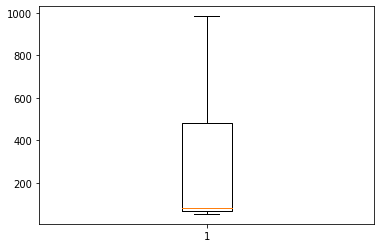

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
895723       273     120919   100000            20919            600     0   
895789       273     120919   100000            20919            600     1   
895867       273     120919   100000            20919            600     2   
895941       273     120919   100000            20919            600     3   
896001       273     120919   100000            20919            600     4   
896049       273     120919   100000            20919            600     5   
896089       273     120919   100000            20919            600     6   
896117       273     120919   100000            20919            600     7   
896145       273     120919   100000            20919            600     8   
896161       273     120919   100000            20919            600     9   
905393     41991     270912   100000           170912            600     0   
905492     41991     270912   100000           170912           

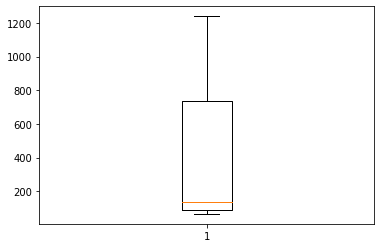

        openmlid  totalsize  fitsize  applicationsize  fitattributes  seed  \
895804       273     120919   100000            20919            700     0   
895877       273     120919   100000            20919            700     1   
895945       273     120919   100000            20919            700     2   
896003       273     120919   100000            20919            700     3   
896065       273     120919   100000            20919            700     4   
896096       273     120919   100000            20919            700     5   
896123       273     120919   100000            20919            700     6   
896141       273     120919   100000            20919            700     7   
896156       273     120919   100000            20919            700     8   
896178       273     120919   100000            20919            700     9   
905433     41991     270912   100000           170912            700     0   
905460     41991     270912   100000           170912           

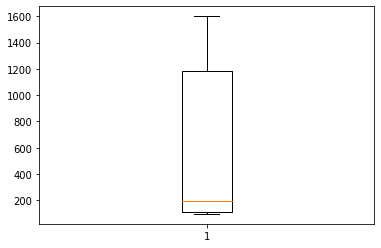

In [218]:
frame = gDF[gDF["algorithm"] == "bf/cfssubseteval"]
for i, group in frame.groupby(["fitsize", "fitattributes"]):
    target = "fittime"
    col = group[target]
    s = np.std(col)
    q1 = np.quantile(col, 0.25)
    q3 = np.quantile(col, 0.75) 
    iqr = q3 - q1
    if s > 100:
        print(group)
        plt.boxplot(col)
        plt.show()

# 3. Generalization Performance for Full Knowledge Exploitation

In [35]:
df.query("algorithm == 'bf/cfssubseteval' and fitsize == 10 and fitattributes == 30 and fittime > 100")

,openmlid,totalsize,fitsize,applicationsize,fitattributes,seed,algorithm,fittime,applicationtime
812502,1486,34465,10,34455,30,1,bf/cfssubseteval,3601,0.0


In [195]:
def removeOutliersFromBatches(df, groupfeatures, target, maxIQRFactor = 1.5):
    bef = len(df) + 1
    cur = len(df)
    while bef != cur:
        groups = df.groupby(groupfeatures)
        pbar = tqdm(total = len(groups))
        bef = cur
        for gIndex, group in groups:
            if len(group) < 4:
                #print("Dropping small batch of size " + str(len(group)))
                df = df.drop(index = group.index)
            else:
                col = group[target]
                q1 = np.quantile(col, 0.25)
                q3 = np.quantile(col, 0.75) 
                iqr = q3 - q1
                if np.max(col) - np.min(col) > 30:
                    outliers = group[group[target] > q3 + np.max([1, iqr]) * maxIQRFactor]
                    df = df.drop(index = outliers.index)
                    outliers = group[group[target] < q1 - np.max([1, iqr]) * maxIQRFactor]
                    df = df.drop(index = outliers.index)
                #outliers = group.query("(" + target + " > " + str() + " or " + str(q) + " > 10) and (" + target + " > " + str(q * maxDeviationFactor) + " or " + target + " < " + str(q / maxDeviationFactor) + ")")
            pbar.update(1)
        pbar.close()
        cur = len(df)
        print("Size after outlier removal: " + str(cur) + ". Removed: " + str(bef - cur))
    return df

In [208]:
gDF = removeOutliersFromBatches(df, ["algorithm", "fitsize", "fitattributes"], "fittime")
print(str(len(gDF)) + "/" + str(len(df)))


Size after outlier removal: 984471. Removed: 33156



Size after outlier removal: 984006. Removed: 465



Size after outlier removal: 983894. Removed: 112



Size after outlier removal: 983859. Removed: 35



Size after outlier removal: 983852. Removed: 7



Size after outlier removal: 983852. Removed: 0
983852/1017627


In [209]:
gDF.to_csv("data/runtimes_all_default_nooutliers.csv", index=False)

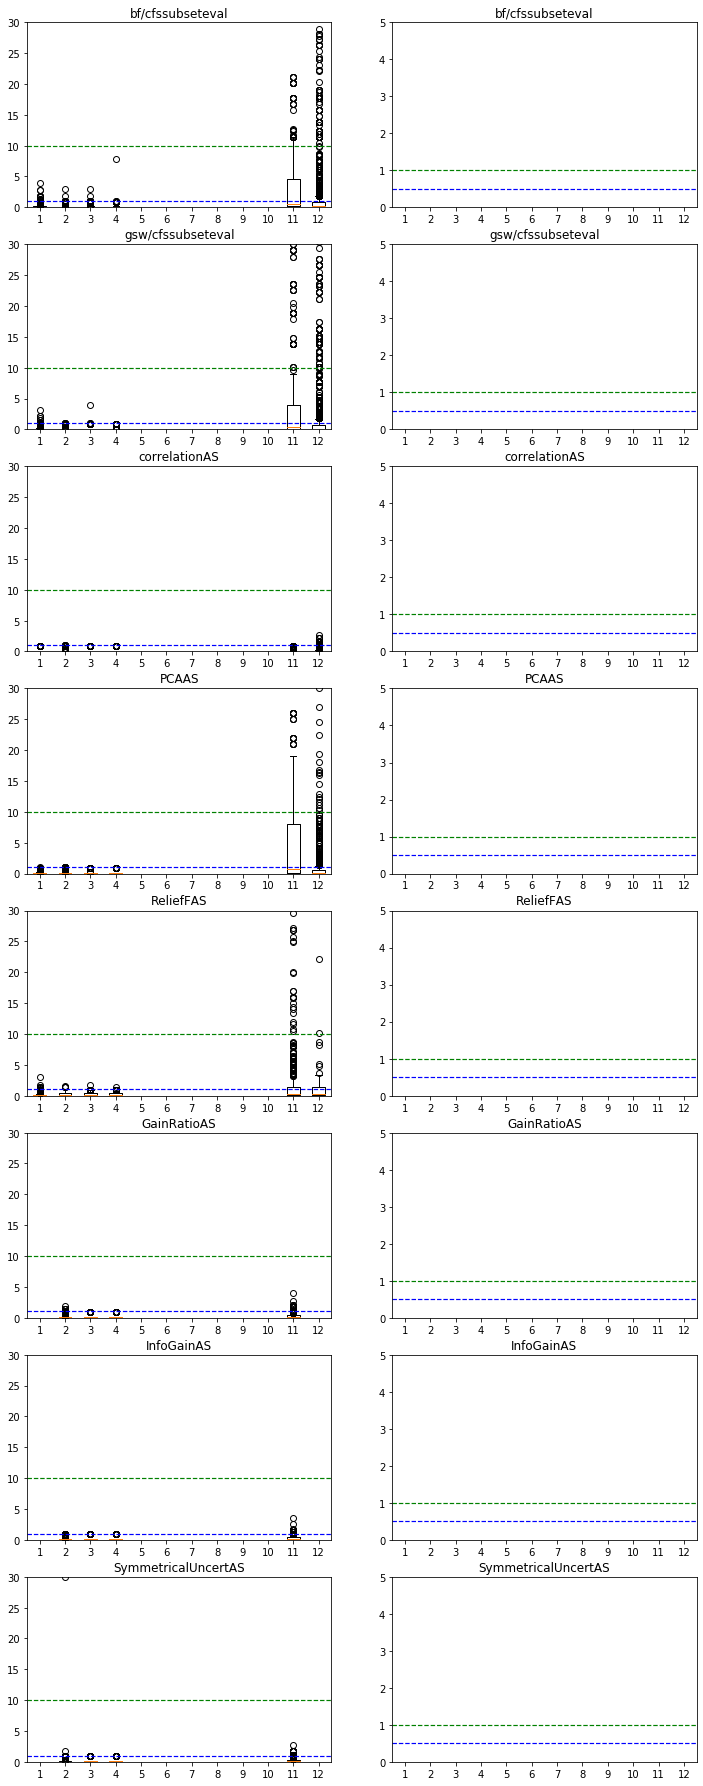

In [219]:
algos = algorithms
fig, ax = plt.subplots(len(algos), 2, figsize=(12, 4 * len(algos)))
for k, algo in tqdm(enumerate(algos)):
    dfFocus = gDF.query("algorithm == '" + algo + "'").dropna()
    datasets = [41066, 3, 60, 183, 718, 881, 930, 1069, 1067, 1120, 41026, 41064]
    dfTrain = dfFocus[~dfFocus["openmlid"].isin(datasets)]
    features = ["fitsize", "fitattributes"]
    X = dfTrain[features]
    Y = dfTrain["fittime"]
    
    combos = X.drop_duplicates()
    
    
    reg = sk.ensemble.RandomForestRegressor(n_estimators = 100)
    if len(X) == 0:
        print("No examples available for algo " + algo)
        continue
    reg.fit(X, Y)
    dfPredict = dfFocus[dfFocus["openmlid"].isin(datasets)]
    absErrors = []
    relErrors = []
    for d in datasets:
        dAbsErrors = []
        dRelErrors = []
        for i, row in dfPredict.query("openmlid ==" + str(d)).iterrows():

            p = reg.predict([row[features].values])
            #print(row[features].values)
            #print(p)
            #print(str(p) + "/" + str(row["fittime"]))
            error = np.abs(p-row["fittime"])
           # if p > 60:
              #  error = error / np.min([p, row["fit"]  * 1000])
             #   dRelErrors.append(error[0])
            #else:
            dAbsErrors.append(error[0])
        absErrors.append(dAbsErrors)
        relErrors.append(dRelErrors)
            #print(str(p) + "/" + str(row["applicationtimeperunit"]  * 10000))
    a = np.ravel(ax)[2 * k]
    a.boxplot(absErrors, 0)
    a.axhline(1, color="blue", linestyle="--", linewidth="1.2")
    a.axhline(10, color="green", linestyle="--", linewidth="1.2")
    a.set_ylim([0, 30])
    a.set_title(algo)
    a = np.ravel(ax)[2 * k + 1]
    a.boxplot(relErrors, 0)
    a.axhline(.5, color="blue", linestyle="--", linewidth="1.2")
    a.axhline(1, color="green", linestyle="--", linewidth="1.2")
    a.set_ylim([0, 5])
    a.set_title(algo)
pass